In [144]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

from utils import draw_trajectories, get_metric

# Trajectories

Drawing trajectories of eval-pid-mss2-ode-n-envs-35-*
Drawing trajectories of eval-pid-mss2-bullet-n-envs-35-*
Drawing trajectories of eval-pid-mss2-simbody-n-envs-35-*
Drawing trajectories of eval-pid-mss2-dart-n-envs-35-*


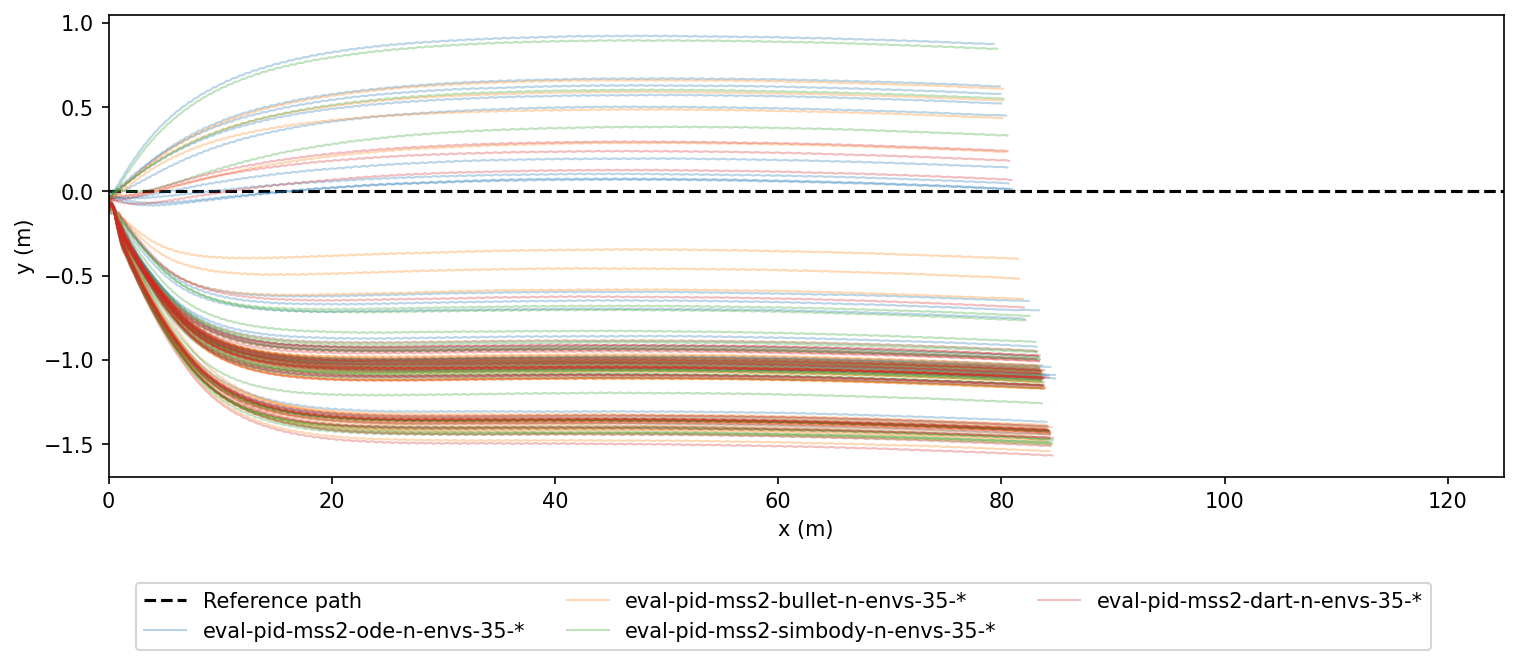

In [138]:
draw_trajectories([
    'eval-pid-mss2-ode-n-envs-35-*',
    'eval-pid-mss2-bullet-n-envs-35-*',
    'eval-pid-mss2-simbody-n-envs-35-*',
    'eval-pid-mss2-dart-n-envs-35-*',
])

Drawing trajectories of eval-pid-mss2-ode-n-envs-1-*
Drawing trajectories of eval-pid-mss2-ode-n-envs-7-*
Drawing trajectories of eval-pid-mss2-ode-n-envs-21-*
Drawing trajectories of eval-pid-mss2-ode-n-envs-35-*


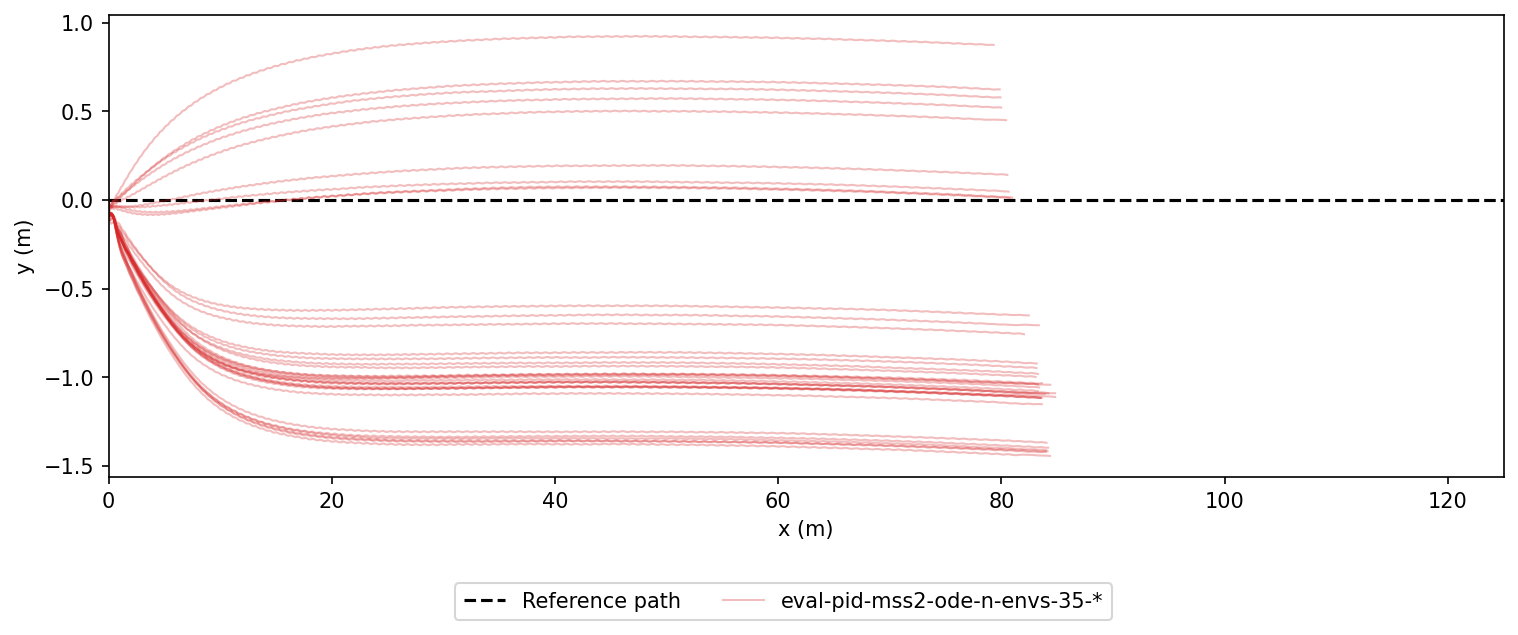

In [146]:
draw_trajectories([
    'eval-pid-mss2-ode-n-envs-1-*',
    'eval-pid-mss2-ode-n-envs-7-*',
    'eval-pid-mss2-ode-n-envs-21-*',
    'eval-pid-mss2-ode-n-envs-35-*',
])

# Time

In [104]:
def plot_nb_steps_per_seconds(names):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
    for name in names:
        print(f'Drawing #steps/sec of {name}')
        seconds, mean_n_steps, std_n_steps = get_metric(
            name, metric='nb_step_by_sec')

        ax.plot(seconds, mean_n_steps, label=name, linewidth=1)
        ax.fill_between(seconds,
                        mean_n_steps - std_n_steps,
                        mean_n_steps + std_n_steps, alpha=.3)
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

Drawing #steps/sec of eval-pid-mss2-ode-n-envs-35-*


Drawing #steps/sec of eval-pid-mss2-bullet-n-envs-35-*
Drawing #steps/sec of eval-pid-mss2-simbody-n-envs-35-*
Drawing #steps/sec of eval-pid-mss2-dart-n-envs-35-*


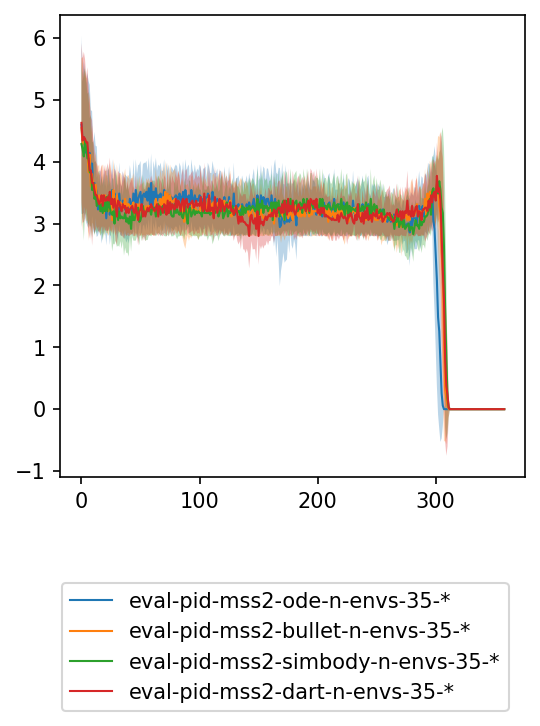

In [139]:
plot_nb_steps_per_seconds([
    'eval-pid-mss2-ode-n-envs-35-*',
    'eval-pid-mss2-bullet-n-envs-35-*',
    'eval-pid-mss2-simbody-n-envs-35-*',
    'eval-pid-mss2-dart-n-envs-35-*',
])

In [103]:
def print_duration(names):
    table = PrettyTable()
    table.field_names = ['', 'Duration (s)']
    for name in names:
        print(f'Getting duration of {name}')
        _, mean_duration, std_duration = get_metric(name, metric='duration')
        table.add_row([name, f'{mean_duration.item():.2f} ± {std_duration.item():.2f}'])
    print(table)

In [140]:
print_duration([
    'eval-pid-mss2-ode-n-envs-35-*',
    'eval-pid-mss2-bullet-n-envs-35-*',
    'eval-pid-mss2-simbody-n-envs-35-*',
    'eval-pid-mss2-dart-n-envs-35-*',
])

Getting duration of eval-pid-mss2-ode-n-envs-35-*
Getting duration of eval-pid-mss2-bullet-n-envs-35-*
Getting duration of eval-pid-mss2-simbody-n-envs-35-*
Getting duration of eval-pid-mss2-dart-n-envs-35-*
+-----------------------------------+---------------+
|                                   |  Duration (s) |
+-----------------------------------+---------------+
|   eval-pid-mss2-ode-n-envs-35-*   | 321.04 ± 2.57 |
|  eval-pid-mss2-bullet-n-envs-35-* | 326.29 ± 2.42 |
| eval-pid-mss2-simbody-n-envs-35-* | 328.52 ± 1.51 |
|   eval-pid-mss2-dart-n-envs-35-*  | 326.41 ± 2.29 |
+-----------------------------------+---------------+


# Derivatives

In [142]:
def print_derivatives(names):
    fig, axs = plt.subplots(1, 3, figsize=(3*4, 4), dpi=150)
    for name in names:
        print(f'Drawing derivatives of {name}')
        for i, metric in enumerate(['obs/dt_theta_boat/2', 'obs/dt_theta_rudder/0', 'obs/dt_theta_sail/0']):
            keys, mean_n_steps, std_n_steps = get_metric(name, metric=metric)
            axs[i].plot(keys, mean_n_steps, linewidth=1, label=name if i == 0 else None, alpha=.5)
            axs[i].fill_between(keys,
                            mean_n_steps - std_n_steps,
                            mean_n_steps + std_n_steps, alpha=.3)
            axs[i].set_xlabel('#steps')
            axs[i].set_ylabel(metric)

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

Drawing derivatives of eval-pid-mss2-bullet-n-envs-35-*
Drawing derivatives of eval-pid-mss2-ode-n-envs-35-*


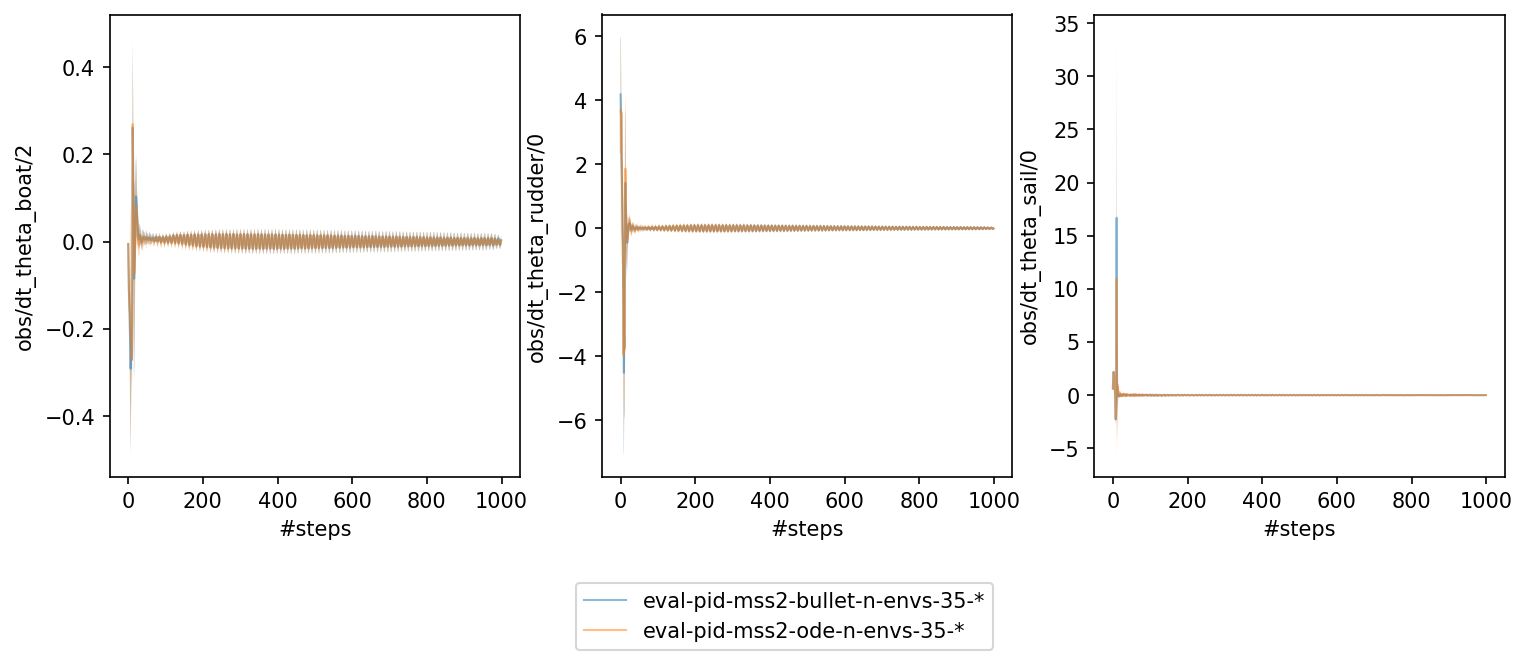

In [143]:
print_derivatives([
    'eval-pid-mss2-bullet-n-envs-35-*',
    'eval-pid-mss2-ode-n-envs-35-*',
    # 'eval-pid-mss1-simbody-n-envs-35-*',
    # 'eval-pid-mss1-dart-n-envs-35-*',
])